In [1]:
# 6ステップでマスターする機械学習

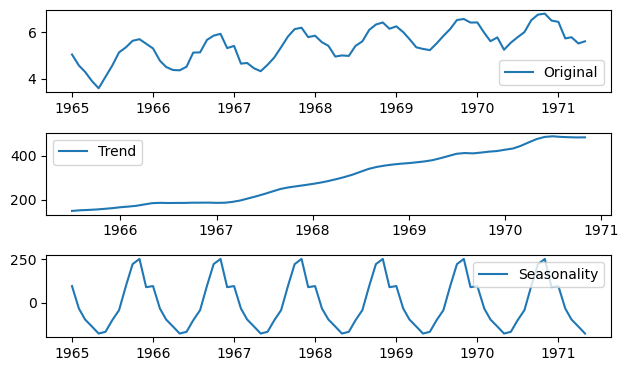

In [5]:
# 3-42. 時系列の分解

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('6ステップでマスターする機械学習/mmlwpi6s-main/Data/TS.csv')
ts = pd.Series(list(df['Sales']), index=pd.to_datetime(df['Month'],format='%Y-%m'))
from statsmodels.tsa.seasonal import seasonal_decompose

# 対数変換
ts_log = np.log(ts)
ts_log.dropna(inplace=True)

decomposition = seasonal_decompose(ts)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

Log transform stationary check p value:  0.785310212484911
First order difference stationary check p value:  0.02402539283987568


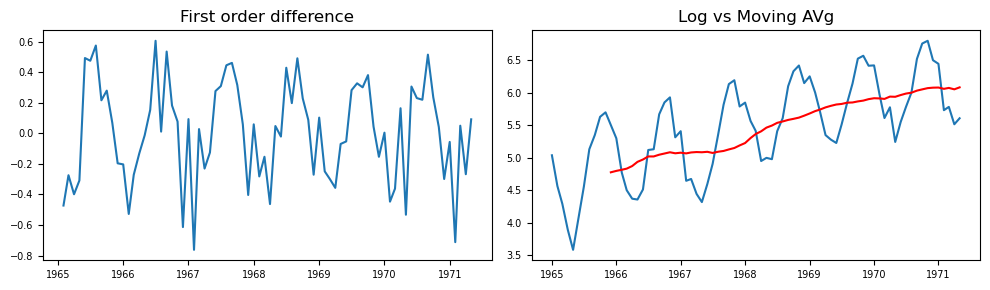

In [6]:
# 3-43. 定常性の確認

from statsmodels.tsa.stattools import adfuller

s_test = adfuller(ts_log, autolag='AIC')
print ("Log transform stationary check p value: ", s_test[1])

# 最初の差分を取る
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
s_test = adfuller(ts_log_diff, autolag='AIC')
print ("First order difference stationary check p value: ", s_test[1] )

# 移動平均で線を滑らかにする
moving_avg = ts_log.rolling(12).mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
ax1.set_title('First order difference')
ax1.tick_params(axis='x', labelsize=7)
ax1.tick_params(axis='y', labelsize=7)
ax1.plot(ts_log_diff)
ax2.plot(ts_log)
ax2.set_title('Log vs Moving AVg')
ax2.tick_params(axis='x', labelsize=7)
ax2.tick_params(axis='y', labelsize=7)
ax2.plot(moving_avg, color='red')
plt.tight_layout()

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 0, 'Lags')

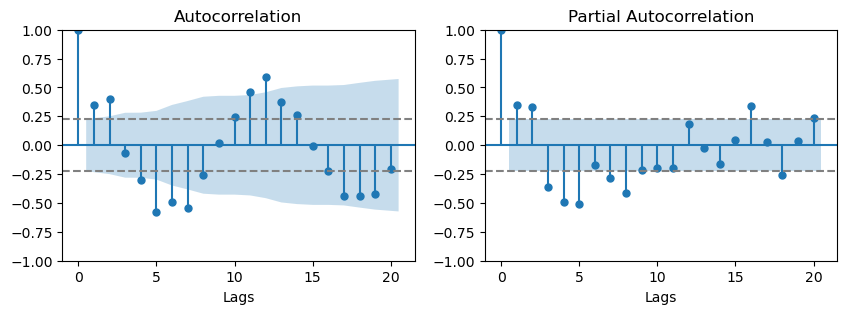

In [8]:
# 3-44. 自己相関検定

import statsmodels.api as sm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
# ACFチャート
fig = sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags=20, ax=ax1)
# 95%信頼区間線の描画
ax1.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.set_xlabel('Lags')
# PACFチャート
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=20, ax=ax2)
# 95%信頼区間線の描画
ax2.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.set_xlabel('Lags')

In [11]:
# 3-45. ARIMAモデルの構築と評価

from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# モデルの構築
model = sm.tsa.ARIMA(ts_log, order=(2,0,2))
# results_ARIMA = model.fit(disp=-1)
# TypeError: fit() got an unexpected keyword argument 'disp'
# 最新のstatsmodelsではdispがサポートされていないらしい

results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

# モデルの評価
print("AIC: ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)
print("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# 自己相関の確認
print("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC:  7.852110626583854
BIC:  21.91494315770596
Mean Absolute Error:  0.19596526110865034
Root Mean Squared Error:  0.2397920770707618
Durbin-Watson statistic : 1.8645734348288756


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AIC;  9.693491754121588
BIC:  26.100129707097377
Mean Absolute Error:  0.19849817865647054
RootMean Squared Error:  0.23957593564340926
Durbin-Watson statistic:  1.8243277455663212


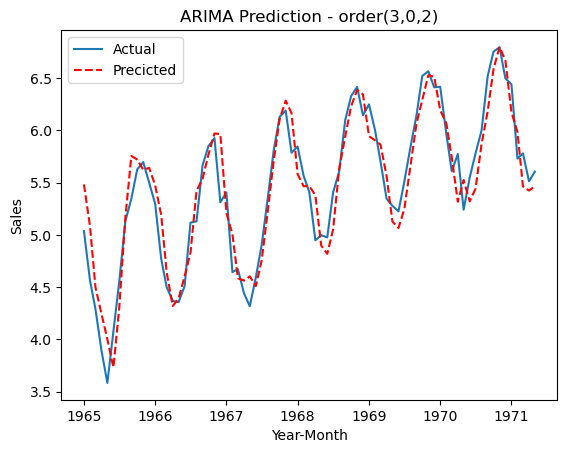

In [12]:
# 3-46. ARIMAモデルの構築とpを3に増大させた場合の評価

model = sm.tsa.ARIMA(ts_log, order=(3,0,2))
# results_ARIMA = model.fit(disp=-1)
results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

plt.title('ARIMA Prediction - order(3,0,2)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Precicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')

print("AIC; ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)

print("Mean Absolute Error: ",
      mean_absolute_error(ts_log.values, ts_predict.values))
print("RootMean Squared Error: ",
      np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

#自己相関の確認
print("Durbin-Watson statistic: ",
      sm.stats.durbin_watson(results_ARIMA.resid.values))

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA par

AIC:  -33.21456112732614
BIC:  -19.230161085608156
Durbin-Watson statistic : 1.2615151793347223


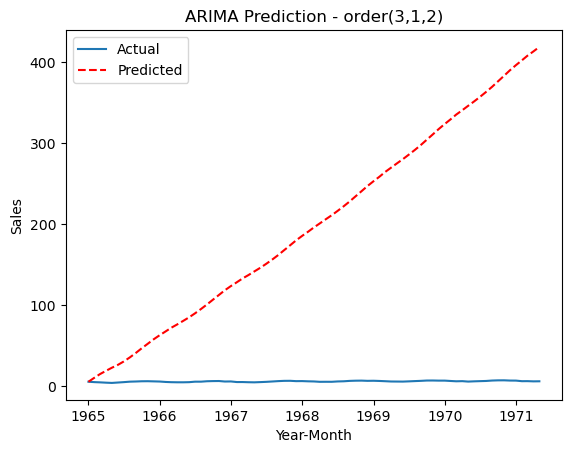

In [16]:
# 3-47. 一次差分とARIMA

model = sm.tsa.ARIMA(ts_log, order=(3,1,2))
# results_ARIMA = model.fit(disp=-1)
results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

# 差分を補うための補正
predictions_ARIMA_diff = pd.Series(ts_predict, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
plt.title('ARIMA Prediction - order(3,1,2)')
plt.plot(ts_log, label='Actual')
plt.plot(predictions_ARIMA_log, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')
print("AIC: ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)
# print("Mean Absolute Error: ", mean_absolute_error(ts_log_diff.values, ts_predict.values))
# print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log_diff.values, ts_predict.values)))

# 自己相関の確認
print("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


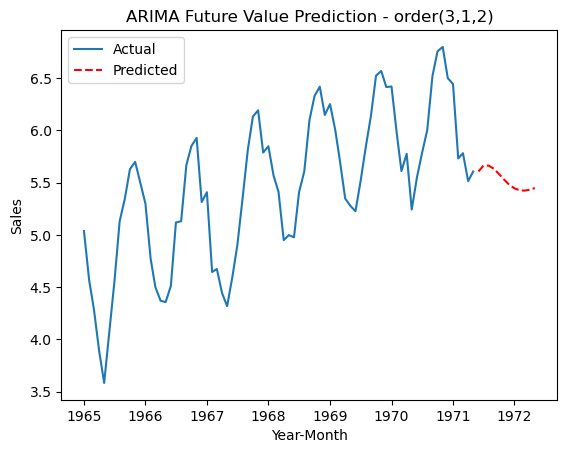

In [17]:
 # 3-48. ARIMAの予測関数
    
# 最終モデル
model = sm.tsa.ARIMA(ts_log, order=(3,0,2))
# results_ARIMA = model.fit(disp=-1)
results_ARIMA = model.fit()

# 将来値の予測
ts_predict = results_ARIMA.predict('1971-06-01', '1972-05-01')
plt.title('ARIMA Future Value Prediction - order(3,1,2)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')

In [18]:
# Pythonコンピュータシミュレーション入門

In [44]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

from scipy import stats

np.random.seed(123)

In [37]:
# ARMAモデル

nobs = 10000
ar = [1, -1.5, 0.7]
ma = [1.0, 0.6]

dist = stats.norm(loc=0, scale=1.0).rvs
y = arma_generate_sample(ar, ma, nsample=nobs, distrvs=dist, burnin=1000)

arma20 = ARIMA(endog=y, order=(2, 0, 0),  trend='n').fit()
arma21 = ARIMA(endog=y, order=(2, 0, 1),  trend='n').fit()
arma32 = ARIMA(endog=y, order=(3, 0, 2),  trend='n').fit()
arma43 = ARIMA(endog=y, order=(4, 0, 3),  trend='n').fit()

print(arma21.summary())

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -14167.234
Date:                Wed, 09 Nov 2022   AIC                          28342.468
Time:                        23:52:28   BIC                          28371.310
Sample:                             0   HQIC                         28352.231
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5064      0.008    189.996      0.000       1.491       1.522
ar.L2         -0.7059      0.008    -90.338      0.000      -0.721      -0.691
ma.L1          0.6016      0.009     68.075      0.0

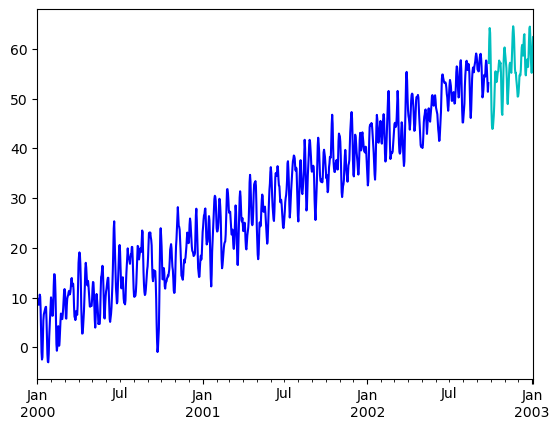

In [45]:
# ARIMAモデル

ar = [1, -1.5, 0.7]
ma = [1.0, 0.6]

nobs = 1000
nobs_test = 100
nobs_all = nobs + nobs_test

dist = stats.norm(loc=0, scale=1.0).rvs

# 知りたい信号成分
sig_all = arma_generate_sample(ar, ma, nsample=nobs_all, distrvs=dist, burnin=500)

# トレンドの信号（1次式型）
coef_a, coef_b = 0.05, 4
trend_all = coef_a*np.arange(len(sig_all)) + coef_b

# 出力信号（トレーニングデータ＋テストデータ）
y_all = sig_all + trend_all

# インデックスを与える
index = pd.date_range('1/1/2000', periods=nobs_all, freq='D')
y_all = pd.Series(y_all, index=index)

#信号データにindexを付加
sig_all = pd.Series(sig_all, index=index)

y = y_all[:nobs]      #観測データはｙ
y_test = y_all[nobs:] #予測精度を見るためのテストデータはy_test

y.tail(5)

y.plot(color='b')
y_test.plot(color='c')

#plt.savefig('fig_SM_ARIMA_signal_trend.pdf')
plt.show()

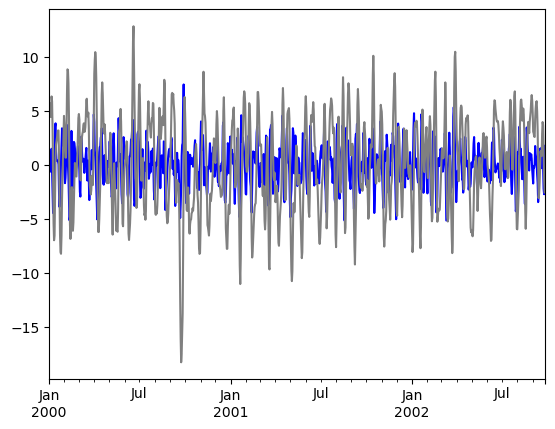

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1466.858
Date:                Thu, 10 Nov 2022   AIC                           2941.717
Time:                        00:01:10   BIC                           2961.344
Sample:                    01-01-2000   HQIC                          2949.176
                         - 09-26-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9758      0.044     22.022      0.000       0.889       1.063
ar.L2         -0.4654      0.038    -12.364      0.000      -0.539      -0.392
ma.L1          0.3049      0.047      6.515      0.0

In [46]:
diff = (y - y.shift()).dropna(axis=0) #先頭のデータは NaNとなるため
diff.plot(color='b')
sig_all[:nobs-1].plot(color='gray')

#plt.savefig('fig_SM_ARIMA_ident_y_diff.png')
plt.show()

arima_result = ARIMA(y, order=(2,1,1), trend='n').fit() # 引数trendは'n'（トレンド無し）を指定
print(arima_result.summary())

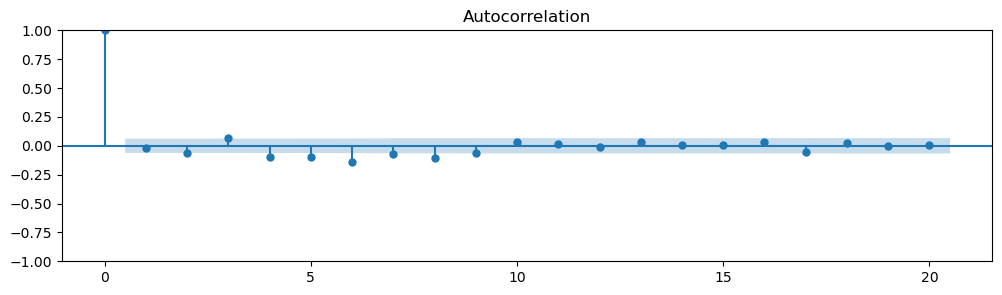

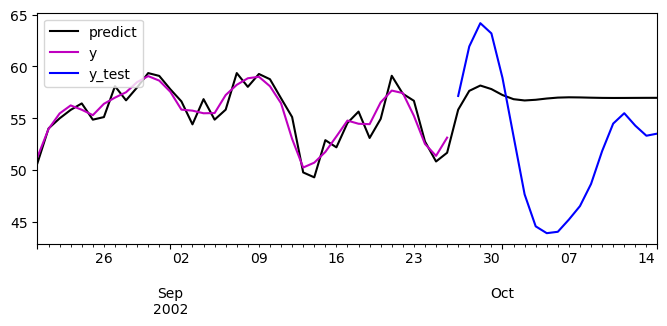

2000-01-01 00:00:00 2002-09-26 00:00:00
2002-09-27 00:00:00 2003-01-04 00:00:00


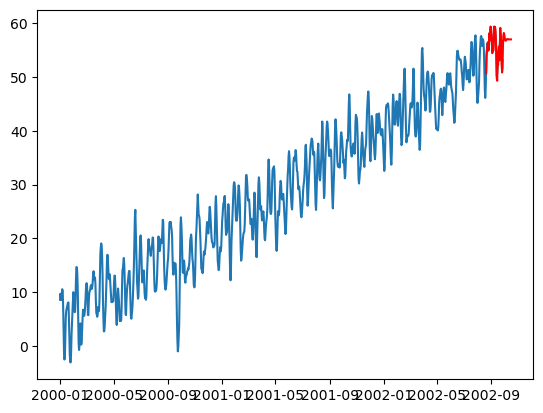

In [47]:
resid = arima_result.resid # residual sequence
sig_val = 0.05 # 有意水準

#resid.plot(figsize=(12,4))
#print(stats.normaltest(resid))

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20, alpha=sig_val, ax=ax1)

#plt.savefig('fig_SM_ARIMA_resid_acf.png')
plt.show()

fig = plt.figure(figsize=(8,3))

start, end, pred_start = '2002-08-20', '2002-10-15', '2002-09-27'
pred = arima_result.predict(start=start, end=end)
pred.plot(label='predict', color='k')
y[start:].plot(color='m', label='y')
y_test[pred_start:end].plot(color='b', label='y_test')
plt.legend(loc='upper left')

#plt.savefig('fig_SM_ARIMA_y_predict.png')
plt.show()

print(y.index[0], y.index[-1])
print(y_test.index[0], y_test.index[-1])

plt.plot(y)
plt.plot(pred, color='r')

In [ ]:
# データサイエンス教本

In [69]:
# ARMA(2,1)パラメータ推定

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
  
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

np.random.seed(123)
FLAG_fig = False

In [70]:
nobs = 10000 #データ数
ar = [1, -1.5, 0.7] # pole = 0.75 +/- 0.37 j < unit circle
ma = [1.0, 0.6]
dist = lambda n: np.random.randn(n)  # 正規分布 N(0,1),  引数 n はダミー
#dist = lambda n: np.random.standard_t(3, size=n)  # t 分布
x = arma_generate_sample(ar, ma, nobs, sigma=1, distrvs=dist, burnin=500)
#print(type(x))

In [71]:
arma20 = ARMA(x, order=(2,0)).fit( trend='nc' ) # AR model
arma21 = ARMA(x, order=(2,1)).fit( trend='nc' ) # trend: バイアスは無い
arma32 = ARMA(x, order=(3,2)).fit( trend='nc' )
arma43 = ARMA(x, order=(4,3)).fit( trend='nc' )

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
#時系列解析

In [ ]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

df_ice = pd.read_csv('../../data/chapter01/icecream.csv')